
Abu Hanif Muhammad Syarubany(13219053|ITB|Mulai Pengerjaan : 13/11/2020

Data bersumber dari MyAnimeList dan Kaggle

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [72]:
anime1=pd.read_csv("anime1.csv")
anime2=pd.read_csv("anime2.csv")
rating=pd.read_csv("rating.csv")

OBSERVASI DATA

In [5]:
anime1.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
anime1.shape

(12294, 7)

In [7]:
anime2.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [8]:
anime2.shape

(19311, 12)

In [9]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [10]:
rating.shape

(7813737, 3)

HANDLING ABNORMAL DATA

1. Menghitung Semua Missing Values

In [12]:
anime1.isnull().sum()[:]

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [13]:
anime2.isnull().sum()[:]

uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64

In [14]:
rating.isnull().sum()[:]

user_id     0
anime_id    0
rating      0
dtype: int64

2. Reset Index

In [15]:
anime1 = anime1.reindex(index=[i for i in range(len(anime1))])
anime2 = anime2.reindex(index=[i for i in range(len(anime2))])

3. Memberikan Perlakuan pada Missing Values di "anime1" dan "anime2"

Berikut ini perlakuan yang tepat menurut saya dalam mengatasi missing values.
- untuk data kuantitatif : mengisi baris missing value dengan rata-rata
- untuk data non-kuantitatif : menghapus baris missing value

Missing Value pada "anime1":
- data kuantitatif : rating
- data non-kuantitatif : genre, type

Missing Value pada "anime2":
- data kuantitatif : episodes, ranked, score
- data non-kuantitatif : synopsis, img_url

In [16]:
#Menghapus Data Non-Kuantitatif
anime1.update(anime1.dropna(subset=["genre","type"]))
anime1.update(anime2.dropna(subset=["synopsis","img_url"]))

#Mengisi Data Kuantitatif dengan Rata-rata
anime1.update(anime1["rating"].fillna(value=anime1["rating"].mean()))
anime2.update(anime2[["episodes","ranked","score"]].fillna(value=anime2[["episodes","ranked","score"]].mean()))

4. Perlakuan Tambahan

In [17]:
anime1.dtypes

anime_id    float64
name         object
genre        object
type         object
episodes     object
rating      float64
members     float64
dtype: object

kolom episodes masih dalam object

kolom episodes yang "Unknown" diganti dengan mean

In [18]:
mean_episode=int(sum([int(i) for i in anime1["episodes"] if i!="Unknown"])/len(anime1))
anime1.update(anime1.loc[anime1.episodes == 'Unknown'].replace("Unknown",mean_episode))
anime1['episodes'] = pd.to_numeric(anime1['episodes'])

mengatasi duplikat data pada dataframe "anime2"

In [21]:
anime2 = anime2.drop_duplicates()

STATISTIKA DASAR

In [28]:
anime1.describe()

,anime_id,episodes,rating,members
count,12294.000000,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,11.227916,6.473902,3.972031e+04
std,11455.294701,47.266405,1.017096,1.213026e+05
min,1.000000,1.000000,1.670000,1.900000e+01
25%,3484.250000,1.000000,5.900000,3.932500e+02
50%,10260.500000,2.000000,6.550000,2.575500e+03
75%,24794.500000,12.000000,7.170000,1.857400e+04
max,34527.000000,3057.000000,10.000000,1.871043e+06


In [29]:
anime2.describe()

,uid,episodes,members,popularity,ranked,score
count,16368.000000,16368.000000,1.636800e+04,16368.000000,16368.000000,16368.000000
mean,19920.474707,11.652004,2.766506e+04,8131.919599,7263.463955,6.352852
std,14227.234351,48.036382,9.364677e+04,4714.683351,4011.283290,0.963101
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,5307.750000,1.000000,2.970000e+02,4042.500000,4068.750000,5.720000
50%,19952.000000,2.000000,1.879000e+03,8115.000000,6866.524194,6.410000
75%,34178.250000,12.000000,1.190100e+04,12208.250000,10534.250000,7.030000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


In [30]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


ANALISIS DASAR

Mengelompokkan Genre

In [31]:
counters={}
genre_rating={}
import re
for index in range(len(anime1)):
    try:
        for genre in re.findall(r"[A-Za-z]+",anime1["genre"][index]):
            try:
                counters[genre]+=1
                genre_rating[genre]+=anime1["rating"][index]
            except:
                counters[genre]=1
                genre_rating[genre]=anime1["rating"][index]
    except:
        continue

Membuat Dataframe Genre

In [32]:
df_genre = pd.DataFrame({"genre":list(counters.keys()),"total":list(counters.values()),"rating":list(genre_rating.values())})
df_genre_count = pd.DataFrame({"genre":list(counters.keys()),"total":list(counters.values())})

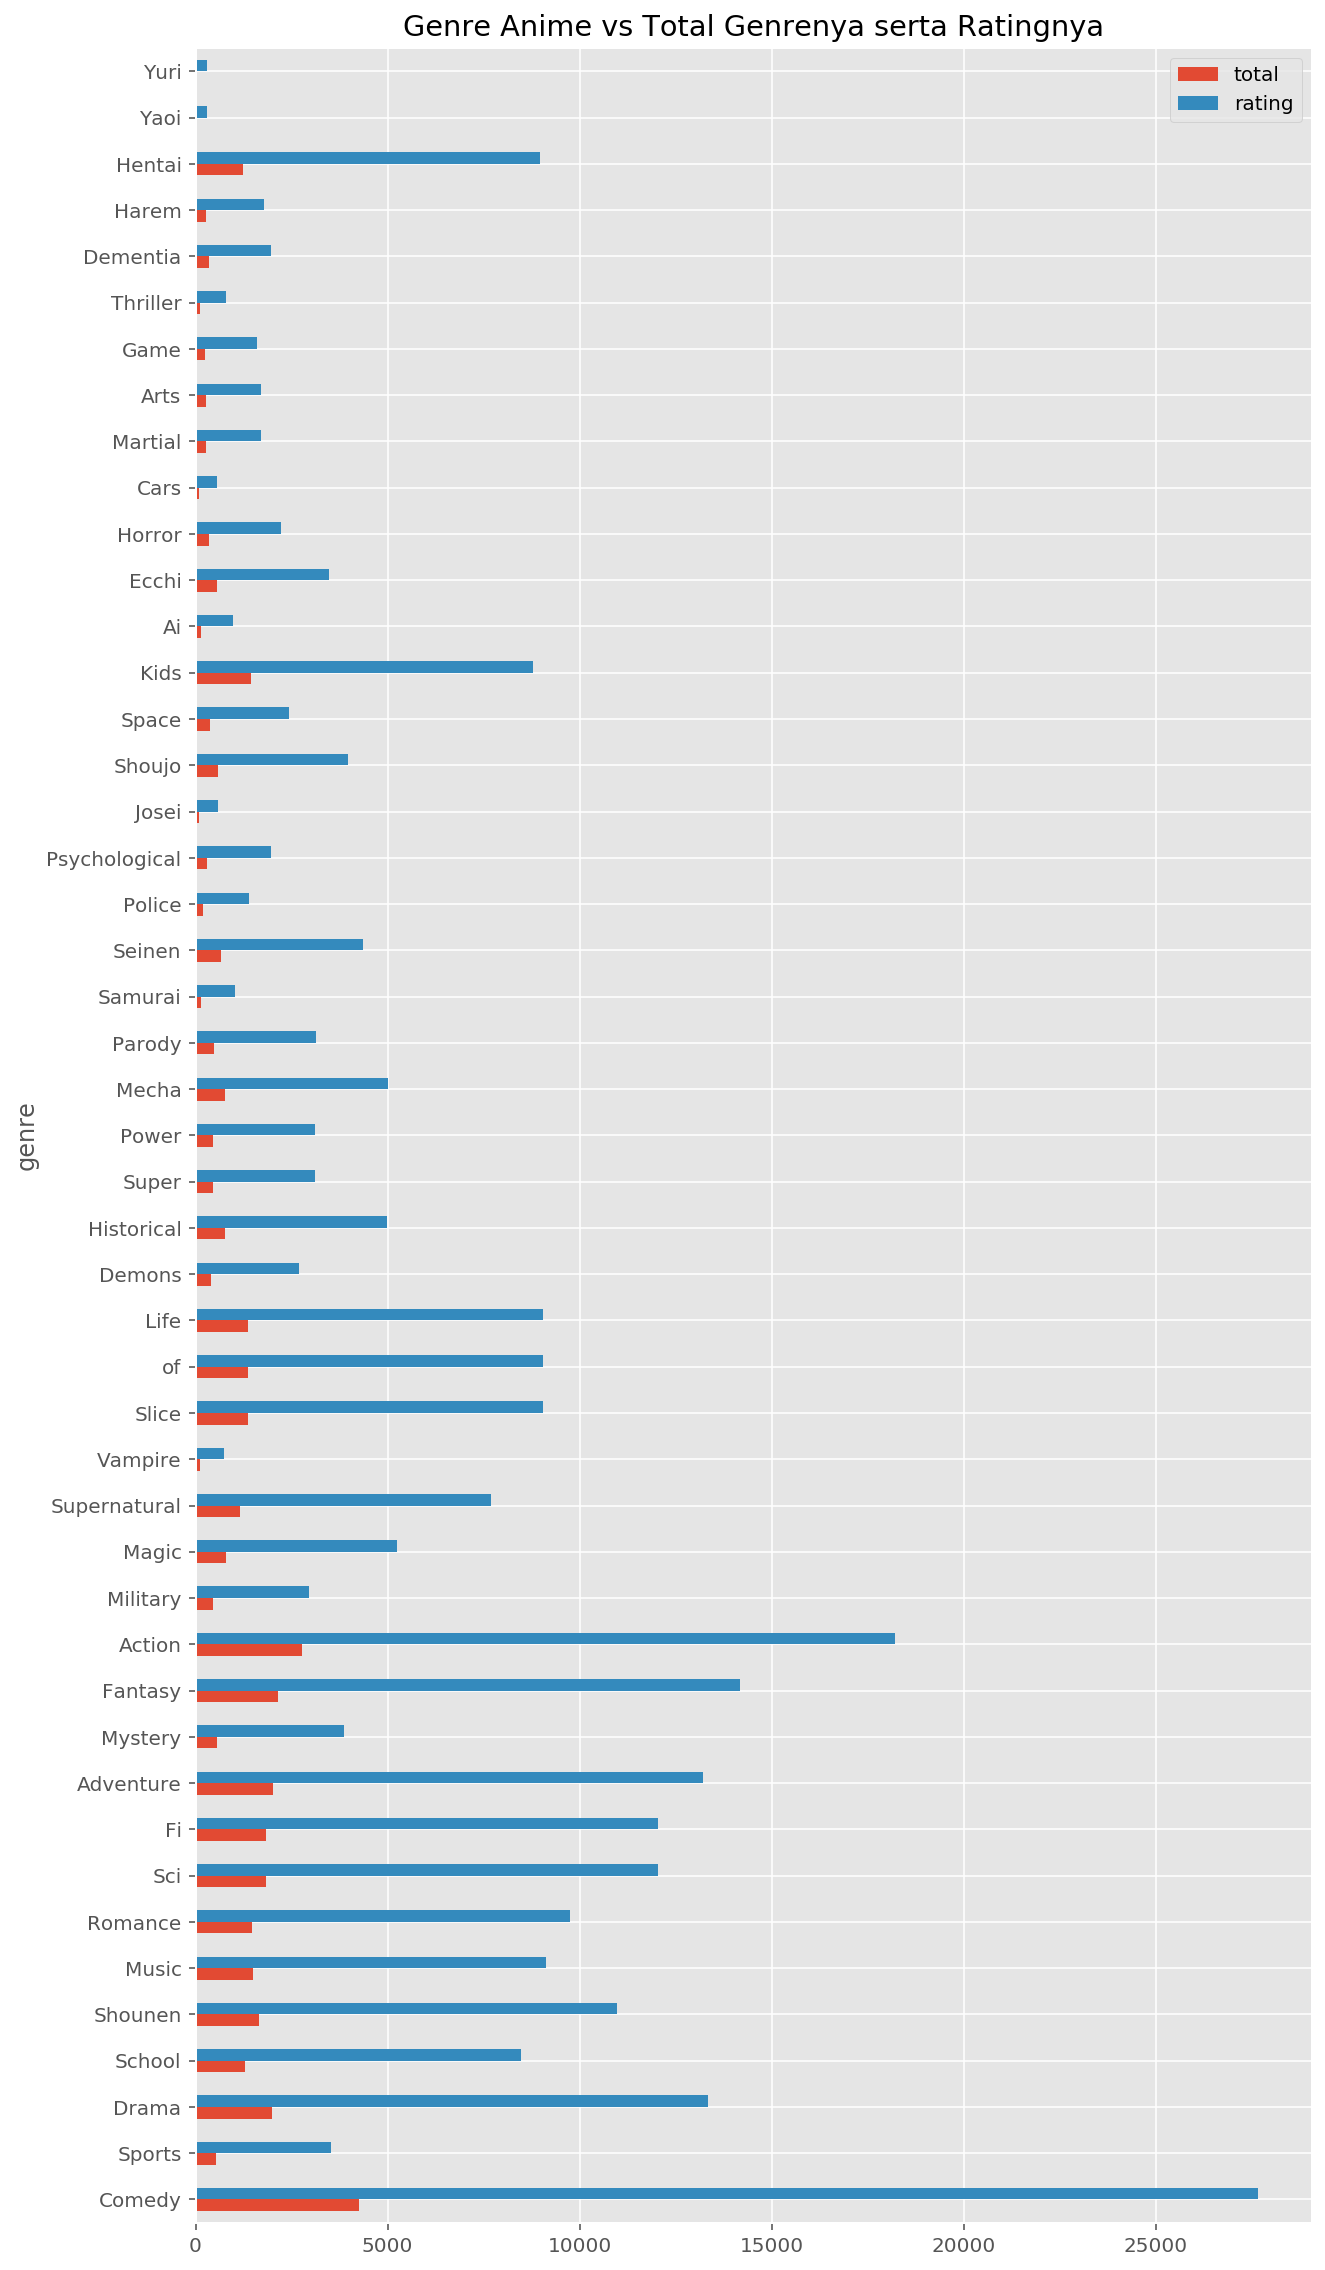

In [35]:
df_genre.plot.barh(x="genre",figsize=(10,20),title="Genre Anime vs Total Genrenya serta Ratingnya")

Pada Grafik diatas, bisa dilihat anime comedy dan action sangat tinggi Ratingnya

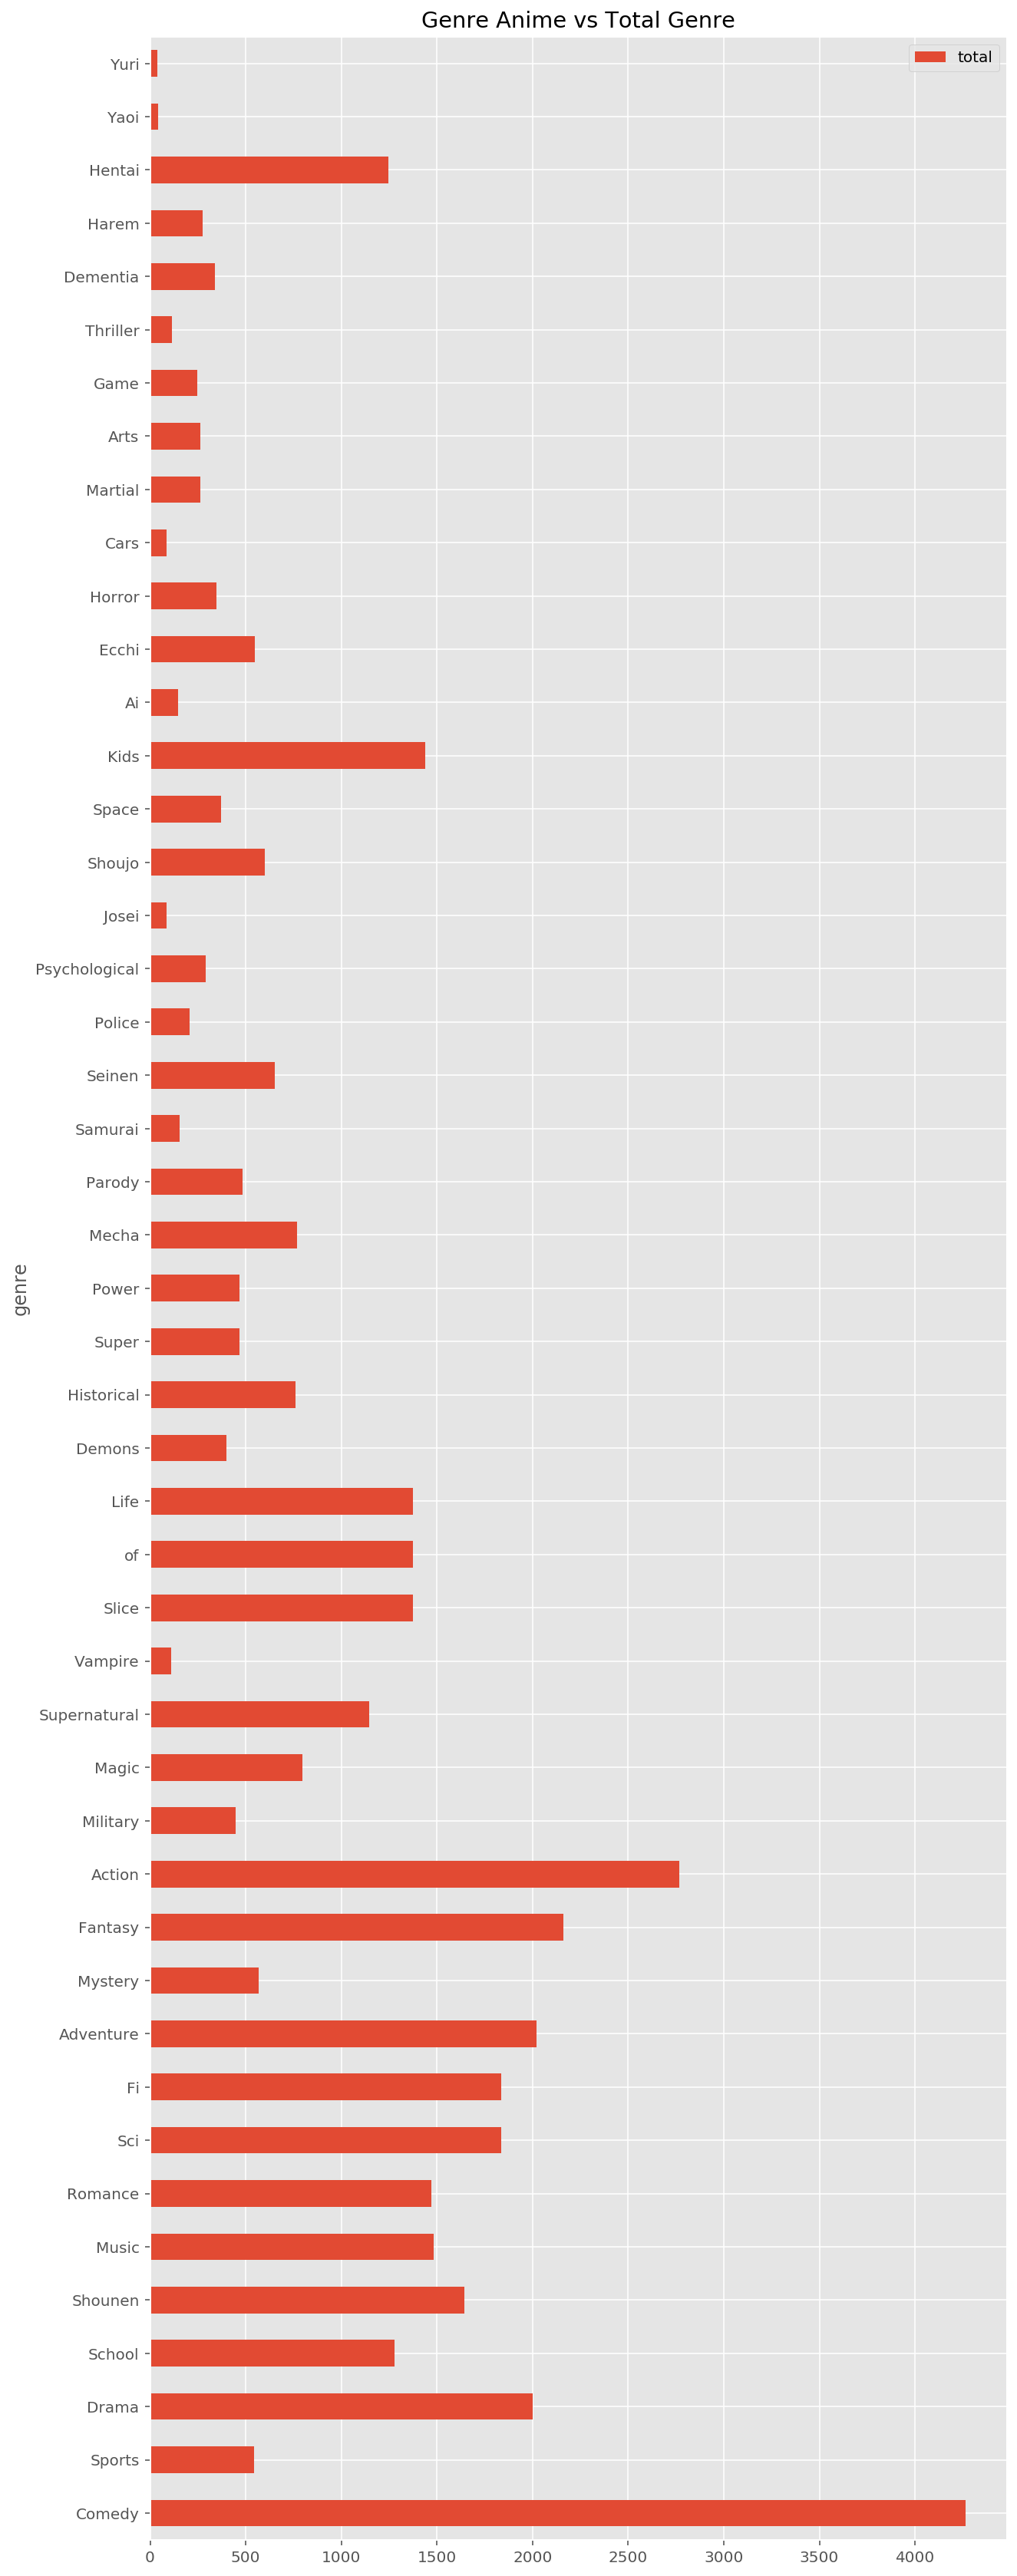

In [36]:
df_genre_count.plot.barh(x="genre",figsize=(10,30),title="Genre Anime vs Total Genre")

Grafik di atas menunjukkan total genre Anime, lagi-lagi Genre Comedy dan Action paling diminati

5 Genre yang paling dominan pada Anime

In [43]:
df_genre.sort_values(by="total",ascending = False).head()

,genre,total,rating
0,Comedy,4266,27675.307250
12,Action,2768,18226.066298
11,Fantasy,2160,14174.659969
9,Adventure,2022,13224.610461
2,Drama,2001,13356.622166


5 Genre Anime dengan Rating tertinggi

In [44]:
df_genre.sort_values(by="rating").head().reset_index()

,index,genre,total,rating
0,46,Yuri,40,290.490000
1,45,Yaoi,43,308.350000
2,37,Cars,88,559.480000
3,30,Josei,86,580.543902
4,16,Vampire,110,729.807803


5 Anime dengan rating tertinggi versi MyAnimeList

In [40]:
anime1.sort_values(by="rating",ascending = False).head()

,anime_id,name,genre,type,episodes,rating,members
10464,33662.0,Taka no Tsume 8: Yoshida-kun no X-Files,"['Comedy', 'Parody', 'Super Power']",Movie,5.0,10.00,158.0
10400,30120.0,Spoon-hime no Swing Kitchen,"['Action', 'Adventure', 'Comedy']",TV,1.0,9.60,199.0
9595,23005.0,Mogura no Motoro,"['Dementia', 'Music']",Movie,1.0,9.50,654.0
0,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0
9078,33607.0,Kahei no Umi,['Slice of Life'],Movie,4.0,9.33,393.0


In [41]:
anime2.sort_values(by="ranked").head(10)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
773,9253,Steins;Gate,The self-proclaimed mad scientist Rintarou Oka...,"['Thriller', 'Sci-Fi']","Apr 6, 2011 to Sep 14, 2011",24.0,1331710,7,2.0,9.11,https://cdn.myanimelist.net/images/anime/5/731...,https://myanimelist.net/anime/9253/Steins_Gate
772,11061,Hunter x Hunter (2011),Hunter x Hunter is set in a world where Hunte...,"['Action', 'Adventure', 'Fantasy', 'Shounen', ...","Oct 2, 2011 to Sep 24, 2014",148.0,1052761,20,3.0,9.11,https://cdn.myanimelist.net/images/anime/11/33...,https://myanimelist.net/anime/11061/Hunter_x_H...
771,32281,Kimi no Na wa.,"Mitsuha Miyamizu, a high school girl, yearns t...","['Romance', 'Supernatural', 'School', 'Drama']","Aug 26, 2016",1.0,1139878,15,4.0,9.09,https://cdn.myanimelist.net/images/anime/5/870...,https://myanimelist.net/anime/32281/Kimi_no_Na_wa
770,38524,Shingeki no Kyojin Season 3 Part 2,Seeking to restore humanity’s diminishing hope...,"['Action', 'Drama', 'Fantasy', 'Military', 'My...","Apr 29, 2019 to Jul 1, 2019",10.0,446370,175,5.0,9.07,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...
769,28977,Gintama°,"Gintoki, Shinpachi, and Kagura return as the f...","['Action', 'Comedy', 'Historical', 'Parody', '...","Apr 8, 2015 to Mar 30, 2016",51.0,281594,351,6.0,9.05,https://cdn.myanimelist.net/images/anime/3/720...,https://myanimelist.net/anime/28977/Gintama%C2%B0
768,9969,Gintama',"After a one-year hiatus, Shinpachi Shimura ret...","['Action', 'Sci-Fi', 'Comedy', 'Historical', '...","Apr 4, 2011 to Mar 26, 2012",51.0,278110,353,7.0,9.04,https://cdn.myanimelist.net/images/anime/4/503...,https://myanimelist.net/anime/9969/Gintama
767,820,Ginga Eiyuu Densetsu,The 150-year-long stalemate between the two in...,"['Military', 'Sci-Fi', 'Space', 'Drama']","Jan 8, 1988 to Mar 17, 1997",110.0,175423,620,8.0,9.03,https://cdn.myanimelist.net/images/anime/13/13...,https://myanimelist.net/anime/820/Ginga_Eiyuu_...
766,35180,3-gatsu no Lion 2nd Season,"Now in his second year of high school, Rei Kir...","['Drama', 'Game', 'Seinen', 'Slice of Life']","Oct 14, 2017 to Mar 31, 2018",22.0,169544,657,9.0,9.02,https://cdn.myanimelist.net/images/anime/3/884...,https://myanimelist.net/anime/35180/3-gatsu_no...
765,28851,Koe no Katachi,"As a wild youth, elementary school student Sho...","['Drama', 'School', 'Shounen']","Sep 17, 2016",1.0,842277,53,10.0,9.01,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...


In [46]:
data={"anime":list(anime2["title"]),"ranked":list(anime2["ranked"])}
anime2_copy = pd.DataFrame (data, columns = ['anime','ranked'])

10 Anime peringkat teratas

In [45]:
anime2_copy.sort_values(by="ranked").head(10)

,anime,ranked
3,Fullmetal Alchemist: Brotherhood,1.0
773,Steins;Gate,2.0
772,Hunter x Hunter (2011),3.0
771,Kimi no Na wa.,4.0
770,Shingeki no Kyojin Season 3 Part 2,5.0
769,Gintama°,6.0
768,Gintama',7.0
767,Ginga Eiyuu Densetsu,8.0
766,3-gatsu no Lion 2nd Season,9.0
765,Koe no Katachi,10.0


In [48]:
dataku={"anime":list(anime1["name"]),"members":list(anime1["members"])}
anime1_copy = pd.DataFrame (dataku, columns = ['anime','members'])

10 Anime dengan member terbanyak

In [49]:
anime1_copy.sort_values(by="members",ascending=False).head(10)

,anime,members
740,Toaru Kagaku no Railgun,1871043.0
681,New Initial D Movie: Legend 2 - Tousou,1754979.0
8409,Crazy Monkey,1657823.0
3,Steins;Gate,1615084.0
3080,Otogi Juushi Akazukin,1615084.0
3093,Cardfight!! Vanguard: Legion Mate-hen,1475219.0
16,Shigatsu wa Kimi no Uso,1475219.0
5146,Kuromajo-san ga Tooru!!,1346036.0
140,Mobile Suit Gundam: The Origin,1346036.0
773,Tamayura: Sotsugyou Shashin Part 2 - Hibiki,1331710.0


In [52]:
datakuh={"anime":list(anime2["title"]),"popularity":list(anime2["popularity"])}
anime2_kopy = pd.DataFrame (datakuh, columns = ['anime','popularity'])

5 Anime Paling Populer

In [57]:
anime2_kopy.sort_values(by="popularity",ascending=False).head(5)

,anime,popularity
1556,Yuukoku no Moriarty,16338
1568,World Trigger 2,16337
13943,Sword Art Online: Alicization - War of Underwo...,16336
1600,Shokugeki no Souma: Gou no Sara,16335
3028,Shin Chuuka Ichiban! 2,16334


Visualisasi Distribusi Data

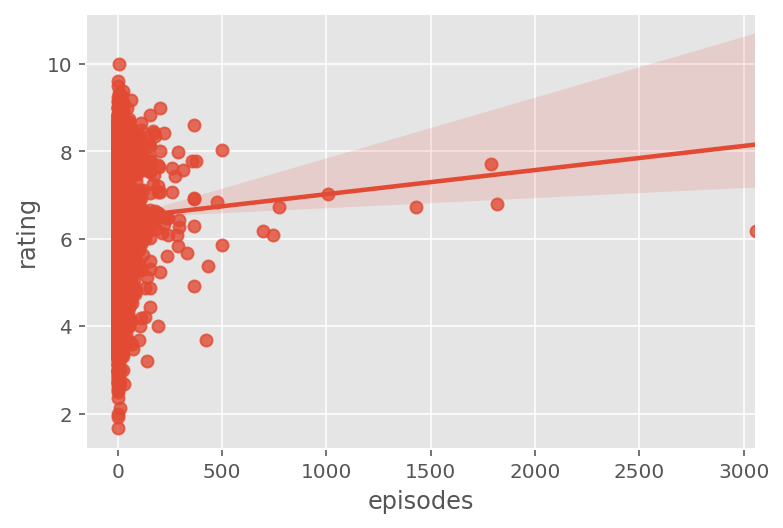

In [59]:
sns.regplot(x=anime1["episodes"], y=anime1['rating'])

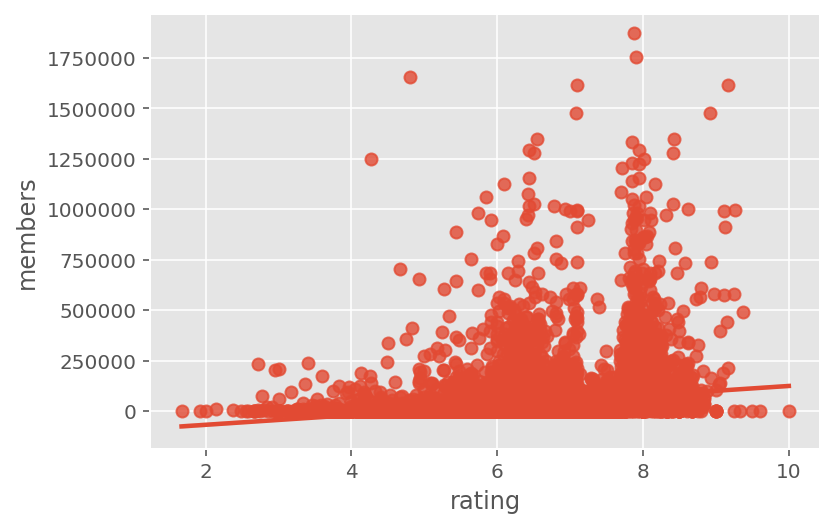

In [28]:
sns.regplot(x=anime1["rating"], y=anime1['members'])

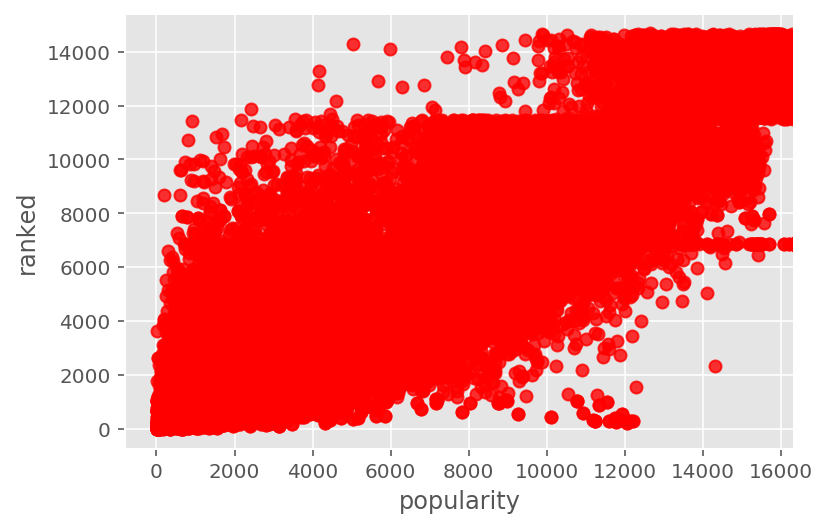

In [29]:
sns.regplot(x=anime2["popularity"], y=anime2['ranked'],color="r")

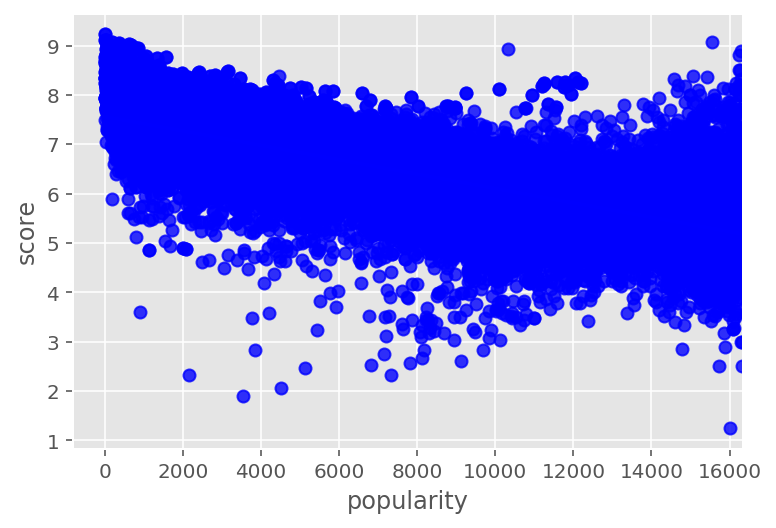

In [30]:
sns.regplot(x=anime2["popularity"], y=anime2['score'],color="b")

In [31]:
anime1.drop(["anime_id"],axis=1).corr(method ='pearson')  

,episodes,rating,members
episodes,1.000000,0.025648,0.094527
rating,0.025648,1.000000,0.201672
members,0.094527,0.201672,1.000000


In [61]:
anime2.drop(["uid"],axis=1).corr(method ='pearson')  

,episodes,members,popularity,ranked,score
episodes,1.000000,0.054002,-0.025915,-0.046629,0.061369
members,0.054002,1.000000,-0.439963,-0.382760,0.390225
popularity,-0.025915,-0.439963,1.000000,0.827707,-0.656100
ranked,-0.046629,-0.382760,0.827707,1.000000,-0.780893
score,0.061369,0.390225,-0.656100,-0.780893,1.000000


Bisa diperhatikan pada grafik dan korelasi di atas, bisa terlihat korelasi-korelasi positif yang berhubungan Lurus

Adapun yang menunjukkan Korelasi Negatif yang berarti berhubungan terbalik

Bisa diperhatikan pada grafik dan korelasi di atas, bisa terlihat bahwa Rating vs Jumlah Episode, Rating vs Members, dan Jumlah Episode vs Members masing-masing berhubungan lurus dengan tingkat korelasi yang berbeda-beda

ANALISIS TAMBAHAN

In [67]:
MeanUser = rating.groupby(['user_id']).mean().reset_index()
MeanUser['mean_rating'] = MeanUser['rating']
MeanUser.drop(['anime_id','rating'],axis=1, inplace=True)

Rata-rata rating tiap User

In [66]:
MeanUser.head()

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


Merge Data 

In [40]:
rating_merge=pd.merge(rating,MeanUser,on=["user_id","user_id"])
rating_merge.head()

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [42]:
merge_anime.head(10)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,99,5
1,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,152,10
2,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,244,10
3,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,271,10
4,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,278,-1
5,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,322,10
6,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,398,10
7,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,462,8
8,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,490,10
9,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,548,10


terurut berdasarkan rating dari MyAnimeList

In [45]:
merge_anime.sort_values(by="rating_x",ascending = False).head().reset_index()

,index,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,0,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,99,5
1,398,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,14191,7
2,400,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,14214,10
3,401,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,14254,10
4,402,32281.0,Kimi no Na wa.,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",Movie,25.0,9.37,489888.0,14296,10


5 Anime dengan total rating yang diisi oleh User (Penggemar Anime)

In [63]:
merge_anime.groupby(['name']).rating_y.count().sort_values(ascending = False).head()

name
Death Note                         10691
Sword Art Online                    9222
Shingeki no Kyojin                  8960
Angel Beats!                        7510
Code Geass: Hangyaku no Lelouch     7466
Name: rating_y, dtype: int64

Ternyata 5 Terurut anime tersebut jauh berbeda dengan rating terurut data sebelumnya, hal ini berbeda ketika data
digabungkan dengan dataframe "rating" spesifik user yang terpisah

KESIMPULAN SEDERHANA

"anime1.csv" dan "anime2.csv" didapat dari MyAnimeList yang resmi, sedangkan "rating.csv" merupakan hasil voting murni dari 
para penggemar anime bukan dari tim penilai resmi. Dengan demikian, sebenarnya data rating dari orang-orang lebih valid untuk 
menentukan rekomendasi anime yang bagus ketimbang data dari webpage MyAnimeList resmi.

Selain itu, untuk Anime rekomendasi bagi orang awam yang hendak mencicipi Anime, maka saya sarankan untuk mulai dari genre 
Comedy dan Action, karena genre tersebut merupakan genre yang ratingnya sangat tinggi dan dominan pada industri film Anime.